# Environment

We would need the following:
1. Python 2.7
2. Scipy, Numpy, matplotlib (pip install scipy numpy matplotlib)
3. Theano (http://deeplearning.net/software/theano/install.html#install)
4. Keras (pip install keras)

# Configure Keras to use Theano as backend

1. create or edit ~/.keras/keras.json
2. Type the following into the file

# Check if everything installed correctly  

In command line / terminal, type python
```
(py2) boonkhailim@skysgdmac035 hotel-download-ui (master) $ python
Python 2.7.10 (default, Jul 30 2016, 19:40:32) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.34)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
```
then the following

In [3]:
import numpy 
import scipy
import matplotlib.pyplot as plt
import keras

Using Theano backend.


# We are good to start now!

Start by importing all the necessary libraries

In [4]:
import numpy as np
from keras.models import Sequential  # simple linear feed forward network
from keras.layers import Dense, Dropout, Activation, Flatten  # core layer in neural network
from keras.layers import Convolution2D, MaxPooling2D  # Convolutional NN layers
from keras.utils import np_utils  # utility function eg: one hot encoding

# Load mnist data from keras datasets 

What is mnist? 
- The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
 *Wikipedia*
 
Good thing is that Keras library already include the datasets, therefore we can save our time from downloading and writing code to separate the data into training and testing data

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We can see that we have 60000 training data with 28 x 28 pixels, while on the other hand we have 10000 testing data with the same dimensions as well. mnist data cames in greyscale, thus there isn't a 3 channel (RGB) in the datasets. we can try to plot the first few training data and its corresponding labels to visualize the datasets

first 5 training label: [5 0 4 1 9]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   

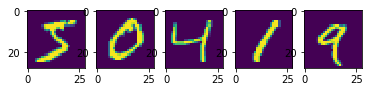

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

num_of_image_to_be_plotted = 5
fig = plt.figure()
for i in range(num_of_image_to_be_plotted):
    a=fig.add_subplot(1,num_of_image_to_be_plotted,i+1)
    plt.imshow(x_train[i])

print "first 5 training label: {}".format(y_train[:5])

print x_train[0]


# Preprocess data
Before we start to use feed the data to Keras, we need to do few more preprocessing.
- Theano backend expect a dimension specifying the depth of the image. eg: RGB image will have a depth of 3. In this case of mnist, since it's a greyscale image therefore we have only 1 channel. 

In [22]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
print x_train.shape
print x_test.shape

(60000, 1, 28, 28)
(10000, 1, 28, 28)


- After which, we normalize our data to be between 0-1. (existing value is 0 - 255, therefore we divide each value by 255). 
- I think there is another common normalization / scaling technique is ( x - avgValue ) / stdValue. Can explore it to see if it improve the accuracy of the model

In [24]:
x_train = x_train.astype('float32')  # convert to float since orignal one is uint8
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

- Based on the class label shown above ([5, 0, 4, 1, 9]), we need to convert it into what we call the one-hot-encoded format for Keras. For example, since we have 10 different categories (digit 0 to 9), a one-hot-encodded format for number 5 will be 0,0,0,0,0,1,0,0,0,0. For digit 1 it will be 0,1,0,0,0,0,0,0,0,0. Basically a 1 for the class label, and 0 for the others.
- We can do this using the utility function provided by Keras

In [27]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [28]:
print y_train.shape
print y_test.shape
print y_train[0]  # 5

(60000, 10)
(10000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# Defining the CNN architecture
Now the interesting part to define the state of the art Convolutional Neural Network!

In [50]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [51]:
# declare a sequential feed forward neural network
model = Sequential()

In [52]:
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(1, 28, 28)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 26, 26)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


- this add the first input layer into the sequential model. input_shape should match the shape of each image in our datasets, in this case, 1 channel and 28 by 28 pixels


In [53]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 12, 12)        0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


- add one more convolution layer
- maxpooling is a way to reduce number of parameters in our model. In this case, a 2 by 2 pooling filter is used. How it works is it will slide through the previous layer and obtain the max of the 4 values
- finally, a dropout is added to randomly drop out certain weight to prevent overfitting

In [54]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

- last but not least, we flatten the output of the layers and then connect it a fully-connected / dense layer. 
- after which we apply dropout again and connect it with another dense layer with 10 outputs (which is our final output layer, since we have 10 categories)
- softmax is another kind of activation function which will provide probabilities across different categories (where the highest probability for a category can be used as our final result / prediction)

# Compile the model
Compile the model by declaring the loss function and optimizer we want to use. Keras has a lot of different loss fucntion and optimizer that we can choose from

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model with training data

In [58]:
model.fit(x_train, y_train, batch_size=32, epochs=1, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 140s - loss: 0.2391 - acc: 0.9258 - val_loss: 0.0623 - val_acc: 0.9831


quite self explanatory. 
- batch_size is the number of samples before each gradient update (default 32)
- epochs is the number of run
- validation_split is the percentage of data withheld for validation. Can also use validation_data to supply data as validation sets

there is also callbacks for you to apply different callbacks during training, eg: to save model weights during training

In [61]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 161s - loss: 0.0958 - acc: 0.9713 - val_loss: 0.0488 - val_acc: 0.9859
Epoch 2/5
48000/48000 [==============================] - 169s - loss: 0.0757 - acc: 0.9771 - val_loss: 0.0540 - val_acc: 0.9838
Epoch 3/5
48000/48000 [==============================] - 171s - loss: 0.0608 - acc: 0.9813 - val_loss: 0.0428 - val_acc: 0.9875
Epoch 4/5
48000/48000 [==============================] - 170s - loss: 0.0557 - acc: 0.9828 - val_loss: 0.0397 - val_acc: 0.9888
Epoch 5/5
48000/48000 [==============================] - 169s - loss: 0.0462 - acc: 0.9858 - val_loss: 0.0403 - val_acc: 0.9888


*train for few more epochs for higher accuracy*

# Evaluate model on test data

In [64]:
score = model.evaluate(x_test, y_test, verbose=1)
print score

10000/10000 [==============================] - 9s     
[0.030641492582148929, 0.99060000000000004]


In [66]:
model.metrics_names

['loss', 'acc']

we can see that the trained model has a 3% loss, and 99% accuracy :)

In [76]:
print model.predict(x_test[:5])
print model.predict_classes(x_test[:5])  # predict first 5 test data

[[  9.89346734e-13   2.09238502e-10   8.17848331e-08   9.23238019e-08
    1.45258304e-13   5.48398089e-12   4.88568802e-17   9.99999821e-01
    4.05325738e-11   8.92524454e-09]
 [  1.53522350e-08   3.15411597e-07   9.99999642e-01   1.22998971e-08
    3.76165099e-10   2.78656633e-12   7.58394625e-10   3.09659798e-11
    5.20637367e-10   2.21382605e-13]
 [  1.27816833e-08   9.99996364e-01   1.76534385e-07   7.74018893e-09
    9.68437689e-07   5.44657119e-08   1.57656110e-08   1.67152552e-06
    6.98099825e-07   3.40456303e-08]
 [  9.99997139e-01   2.85667795e-10   8.04159797e-08   1.10353851e-10
    2.51742605e-09   1.50479584e-09   2.23656025e-06   1.40814582e-09
    3.63241298e-07   1.95514005e-07]
 [  7.23103591e-11   1.13826051e-08   2.27217960e-08   9.07505928e-12
    9.99984860e-01   4.18973085e-11   1.31882958e-08   2.89477387e-10
    5.52255841e-08   1.50384512e-05]]
5/5 [==============================] - 0s
[7 2 1 0 4]


first 5 testing label: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


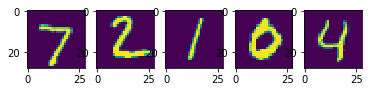

In [78]:
num_of_image_to_be_plotted = 5
fig = plt.figure()
for i in range(num_of_image_to_be_plotted):
    a=fig.add_subplot(1,num_of_image_to_be_plotted,i+1)
    plt.imshow(x_test[i][0])

print "first 5 testing label: {}".format(y_test[:5])